# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Initialize-Environment" data-toc-modified-id="Initialize-Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialize Environment</a></div><div class="lev2 toc-item"><a href="#Generate-List-of-Data" data-toc-modified-id="Generate-List-of-Data-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generate List of Data</a></div><div class="lev2 toc-item"><a href="#Construct-Configuration-Matrices" data-toc-modified-id="Construct-Configuration-Matrices-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Construct Configuration Matrices</a></div><div class="lev1 toc-item"><a href="#Optimize-Dynamic-Subgraphs" data-toc-modified-id="Optimize-Dynamic-Subgraphs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Optimize Dynamic Subgraphs</a></div><div class="lev2 toc-item"><a href="#Generate-Cross-Validation-Parameter-Sets" data-toc-modified-id="Generate-Cross-Validation-Parameter-Sets-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generate Cross-Validation Parameter Sets</a></div><div class="lev2 toc-item"><a href="#SGE-Helper-Script-for-NMF-Cross-Validation" data-toc-modified-id="SGE-Helper-Script-for-NMF-Cross-Validation-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>SGE Helper Script for NMF Cross-Validation</a></div><div class="lev2 toc-item"><a href="#Quality-Measures-in-Parameter-Space" data-toc-modified-id="Quality-Measures-in-Parameter-Space-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Quality Measures in Parameter Space</a></div><div class="lev1 toc-item"><a href="#Detect-Dynamic-Subgraphs" data-toc-modified-id="Detect-Dynamic-Subgraphs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Detect Dynamic Subgraphs</a></div><div class="lev2 toc-item"><a href="#Map-NMF-Consensus-to-Identify-Seed-Subgraphs" data-toc-modified-id="Map-NMF-Consensus-to-Identify-Seed-Subgraphs-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Map NMF Consensus to Identify Seed Subgraphs</a></div><div class="lev2 toc-item"><a href="#Reduce-Seed-Subgraphs-to-Consensus-Subgraphs" data-toc-modified-id="Reduce-Seed-Subgraphs-to-Consensus-Subgraphs-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Reduce Seed Subgraphs to Consensus Subgraphs</a></div><div class="lev2 toc-item"><a href="#Plot-Subgraphs" data-toc-modified-id="Plot-Subgraphs-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot Subgraphs</a></div><div class="lev1 toc-item"><a href="#Subgraphs-of-Brain-Systems" data-toc-modified-id="Subgraphs-of-Brain-Systems-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Subgraphs of Brain Systems</a></div><div class="lev2 toc-item"><a href="#Load-Subgraphs-and-Expression" data-toc-modified-id="Load-Subgraphs-and-Expression-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load Subgraphs and Expression</a></div><div class="lev2 toc-item"><a href="#Load-Atlas" data-toc-modified-id="Load-Atlas-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Load Atlas</a></div><div class="lev3 toc-item"><a href="#Render-brain-systems" data-toc-modified-id="Render-brain-systems-421"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Render brain systems</a></div><div class="lev2 toc-item"><a href="#Condense-Subgraphs-into-a-Dictionary" data-toc-modified-id="Condense-Subgraphs-into-a-Dictionary-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Condense Subgraphs into a Dictionary</a></div><div class="lev2 toc-item"><a href="#Filter-Subgraphs-with-Sparse-Expression" data-toc-modified-id="Filter-Subgraphs-with-Sparse-Expression-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Filter Subgraphs with Sparse Expression</a></div><div class="lev2 toc-item"><a href="#Circle-Plot" data-toc-modified-id="Circle-Plot-45"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Circle Plot</a></div>

# Initialize Environment

In [1]:
try:
    %load_ext autoreload
    %autoreload 2
    %reset
except:
    print 'NOT IPYTHON'

from __future__ import division

import os
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
import sys
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import scipy.io as io
import h5py
import matplotlib.pyplot as plt
from matplotlib import rcParams

echobase_path = '/data/jag/akhambhati/hoth_research/Echobase'
sys.path.append(echobase_path)
import Echobase
convert_conn_vec_to_adj_matr = Echobase.Network.Transforms.configuration.convert_conn_vec_to_adj_matr
convert_adj_matr_to_cfg_matr = Echobase.Network.Transforms.configuration.convert_adj_matr_to_cfg_matr
subgraph = Echobase.Network.Partitioning.Subgraph

rcParams = Echobase.Plotting.fig_format.update_rcparams(rcParams)

path_Remotes = '/data/jag/akhambhati/Remotes'
path_CoreData = path_Remotes + '/CORE.fMRI_cogcontrol.medaglia'
path_PeriphData = path_Remotes + '/RSRCH.NMF_CogControl'
path_InpData = path_PeriphData + '/e01-FuncNetw'
path_ExpData = path_PeriphData + '/e02b-FuncSubg'

for path in [path_CoreData, path_PeriphData, path_ExpData]:
    if not os.path.exists(path):
        print('Path: {}, does not exist'.format(path))
        os.makedirs(path)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


/home/akhambhati/Developer/miniconda2/envs/echobase/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Generate List of Data

In [2]:
inp_fname = glob.glob('{}/*.npz'.format(path_InpData))

expr_dict = {}
for fname in inp_fname:
    subj_id = fname.split('/')[-1].split('.')[0]
    expr_id = fname.split('/')[-1].split('.')[1]
    
    try:
        expr_dict[expr_id]['adj_files'].append(fname)
    except:
        expr_dict[expr_id] = {}
        expr_dict[expr_id]['adj_files'] = []
        expr_dict[expr_id]['adj_files'].append(fname)

## Construct Configuration Matrices
*__WARNING: Will Delete Existing Output__*

In [ ]:
# Remove all existing output (retains pipe/pipeline definitions)
rm_outp = glob.glob("{}/NMF_Optimization.CfgMatr.npz".format(path_ExpData))

for rm_type in [rm_outp]:
    for path in rm_type:
        try:
            os.remove(path)
        except:
            print("{} not found".format(path))

In [6]:
# Populate the network configuration matrix over the whole population
key_ord = ['adj_rs_pos', 'adj_rs_neg',
           'adj_lo_pos', 'adj_lo_neg',
           'adj_hi_pos', 'adj_hi_neg']

cfg_list = []
cfg_key = []
for expr_id in expr_dict.keys():    
    for fname in expr_dict[expr_id]['adj_files']:
        df = np.load(fname)
        
        for key in key_ord:
            cfg_matr = convert_adj_matr_to_cfg_matr(df[key])
            for cfg_vec in cfg_matr:
                cfg_list.append(cfg_vec)
                cfg_key.append('{}_{}'.format(key, expr_id))
cfg_matr=np.array(cfg_list)
cfg_key=np.array(cfg_key)

# Generate a lookup table for the observations of cfg_matr
# subjects, task conditions + pos/neg interactions, blocks
n_obs, n_conn = cfg_matr.shape
key_type = np.unique(cfg_key)
n_key = len(key_type)
n_block = 6 
n_subj = int(n_obs / (n_key*n_block))

cfg_obs_idx = np.arange(n_obs)
cfg_obs_lut = np.zeros((n_subj, n_key, n_block))
for key_ii, key in enumerate(key_type):
    key_ix = np.flatnonzero(cfg_key == key)
    cfg_obs_lut[:, key_ii, :] = cfg_obs_idx[key_ix].reshape(n_subj, n_block)

np.savez('{}/NMF_Optimization.CfgMatr.npz'.format(path_ExpData),
         cfg_matr=cfg_matr,
         cfg_key=cfg_key,
         cfg_obs_lut=cfg_obs_lut)

# Optimize Dynamic Subgraphs

## Generate Cross-Validation Parameter Sets

In [12]:
# Load configuration matrix
cfg_data = np.load('{}/NMF_Optimization.CfgMatr.npz'.format(path_ExpData))
cfg_matr = cfg_data['cfg_matr']
cfg_obs_lut = cfg_data['cfg_obs_lut']

# Generate folds
n_subj_per_fold = 2
subj_obs = cfg_obs_lut.reshape(cfg_obs_lut.shape[0], -1)
fold_obs = subj_obs.reshape(-1, n_subj_per_fold, subj_obs.shape[-1])
fold_obs = fold_obs.reshape(fold_obs.shape[0], -1)
fold_list = [list(ff) for ff in fold_obs]

# Cross-Validation Progress
str_path = '{}/NMF_CrossValidation.Progress.txt'.format(path_ExpData)
if os.path.exists(str_path):
    os.remove(str_path)

# Get parameter search space
param_list = Echobase.Network.Partitioning.Subgraph.optimize_nmf.gen_random_sampling_paramset(
    rank_range=(2, 51),
    alpha_range=(0.01, 1.0),
    beta_range=(0.01, 1.0),
    n_param=1000,
    fold_list=fold_list,
    str_path=str_path)

# Save param_list for sge run
np.savez('{}/NMF_CrossValidation.Param_List.npz'.format(path_ExpData),
         param_list=param_list)

## SGE Helper Script for NMF Cross-Validation

In [34]:
# Map NMF xval to all the parameter sets
job_str = './NMF_xval.py {} {}'.format(echobase_path, path_ExpData)
qsub_str = 'qsub -t 1-{} {}'.format(len(param_list), job_str)

os.chdir('./e02b-SGE_Scripts/')
!sh {qsub_str}
os.chdir('../')

Your job-array 2592737.1-14000:1 ("NMF_xval.py") has been submitted


In [44]:
# Reduce NMF xval output to a qmeas_list

path_xval_out = glob.glob('{}/NMF_CrossValidation.Param.*.npz'.format(path_ExpData))
qmeas_list = [np.load(pth)['qmeas_dict'][()] for pth in path_xval_out]

## Quality Measures in Parameter Space

In [56]:
param_list = np.load('{}/NMF_CrossValidation.Param_List.npz'.format(path_ExpData))['param_list']
all_param, opt_param = Echobase.Network.Partitioning.Subgraph.optimize_nmf.find_optimum_xval_paramset(param_list, qmeas_list)
np.savez('{}/NMF_CrossValidation.Optimal_Param.npz'.format(path_ExpData),
         opt_param=opt_param)

Optimal Rank: 16
Optimal Alpha: 0.528737609832
Optimal Beta: 0.502803970199


Optimal Rank: 18
Optimal Alpha: 0.518709167942
Optimal Beta: 0.484093513534


/home/akhambhati/Developer/miniconda2/envs/echobase/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


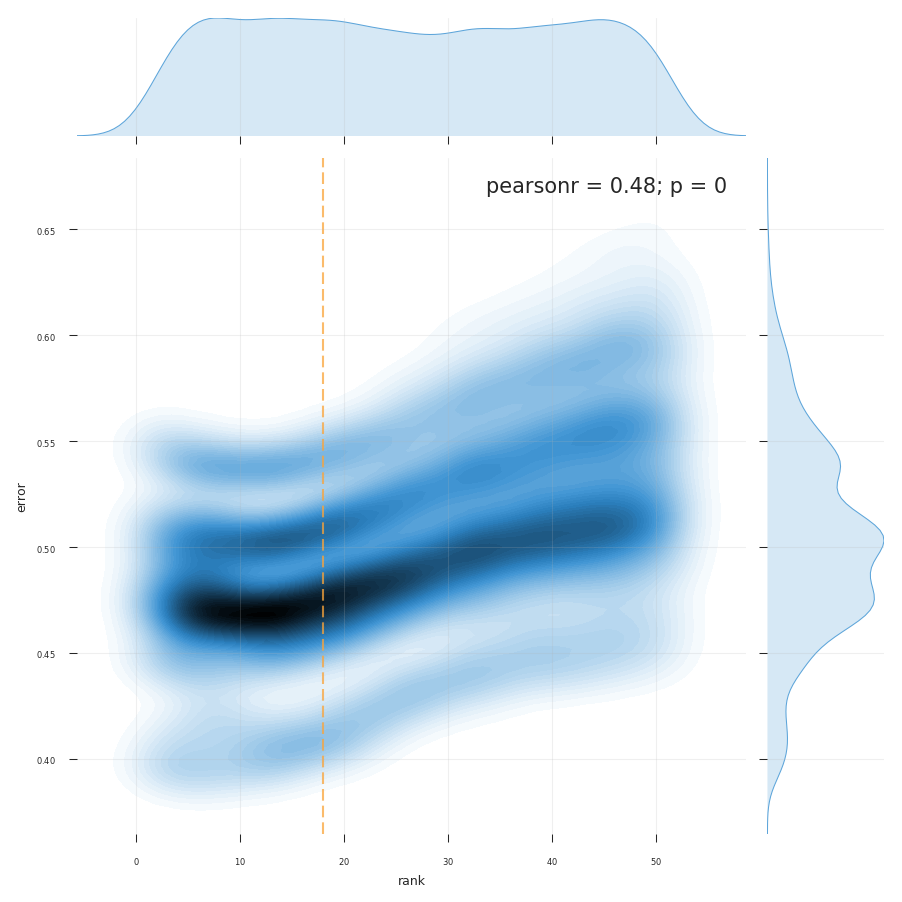

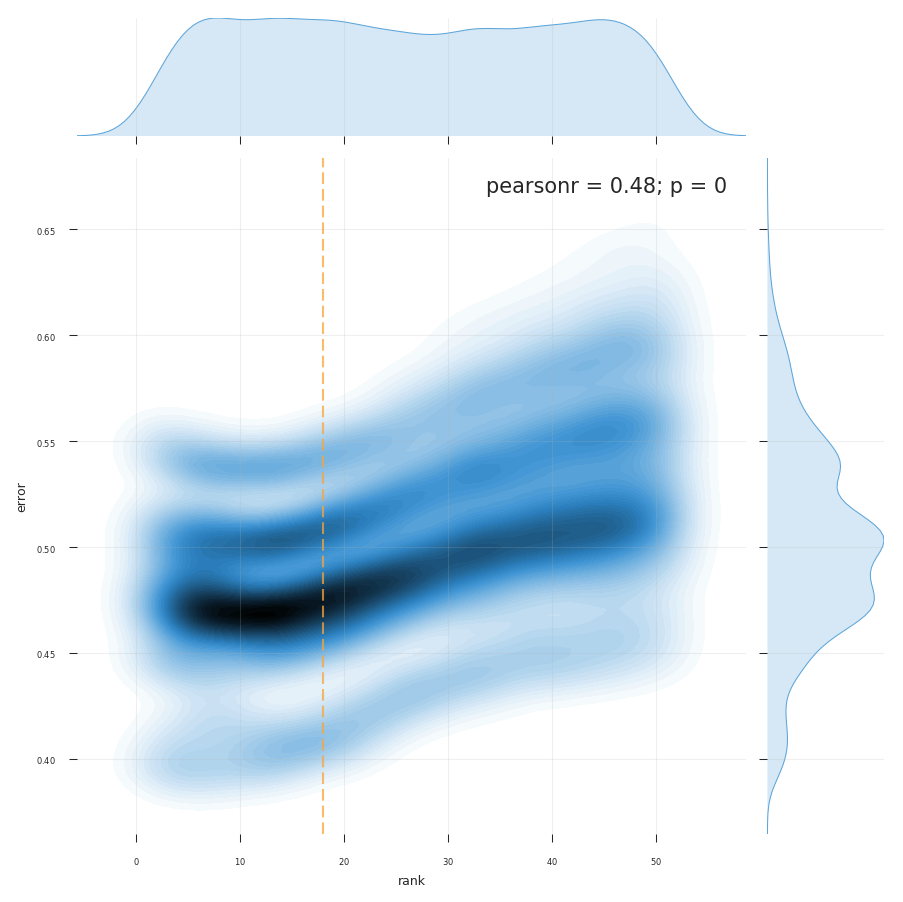

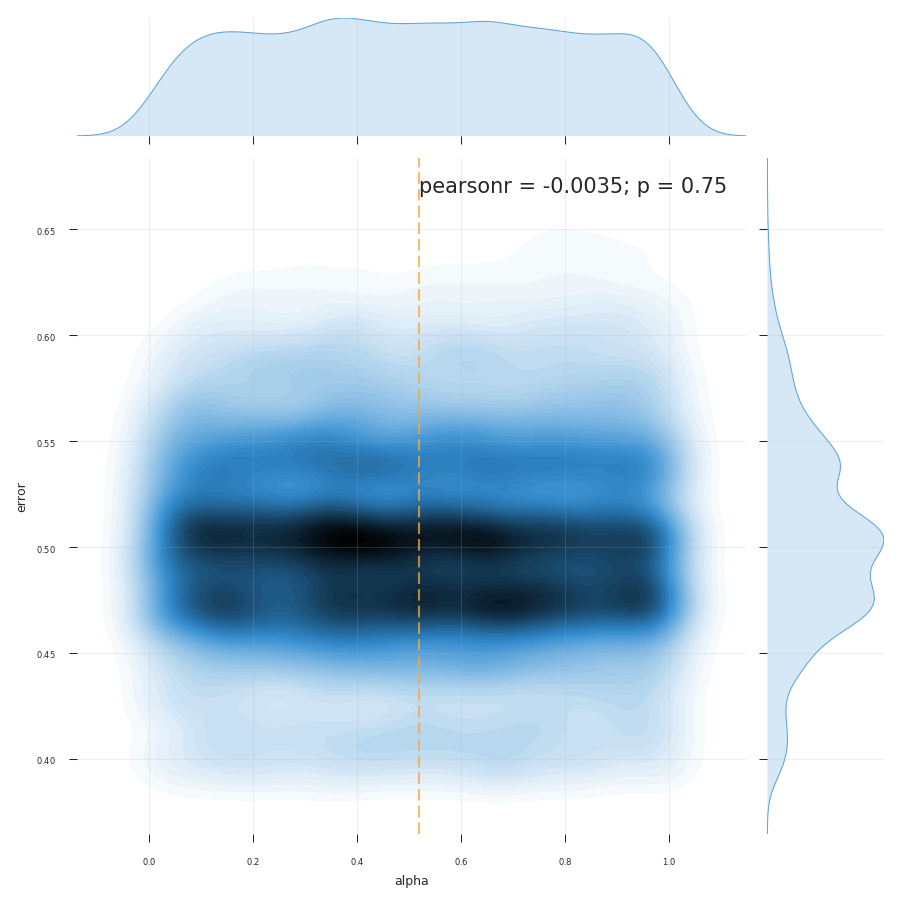

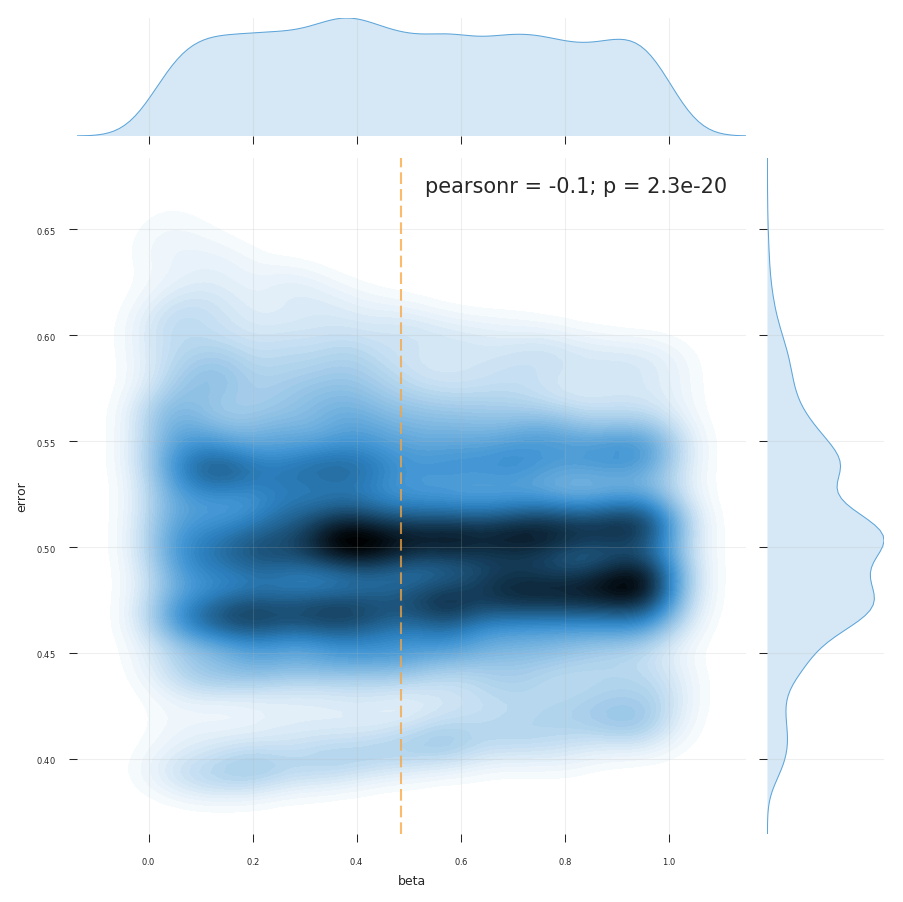

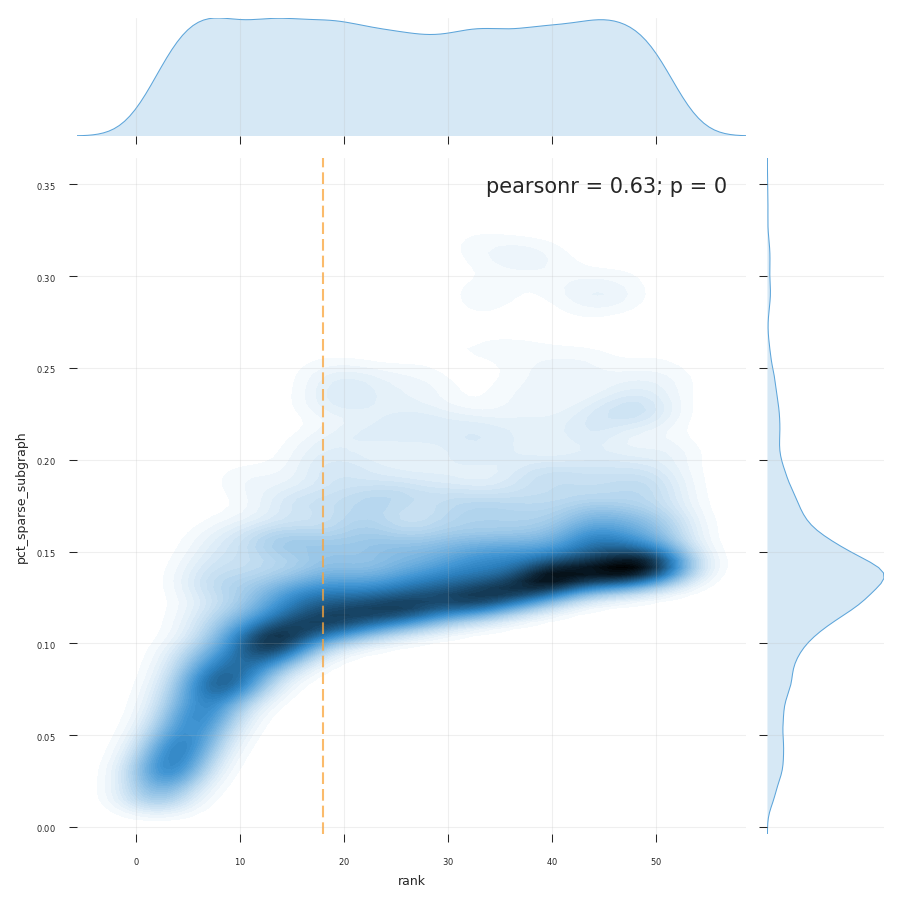

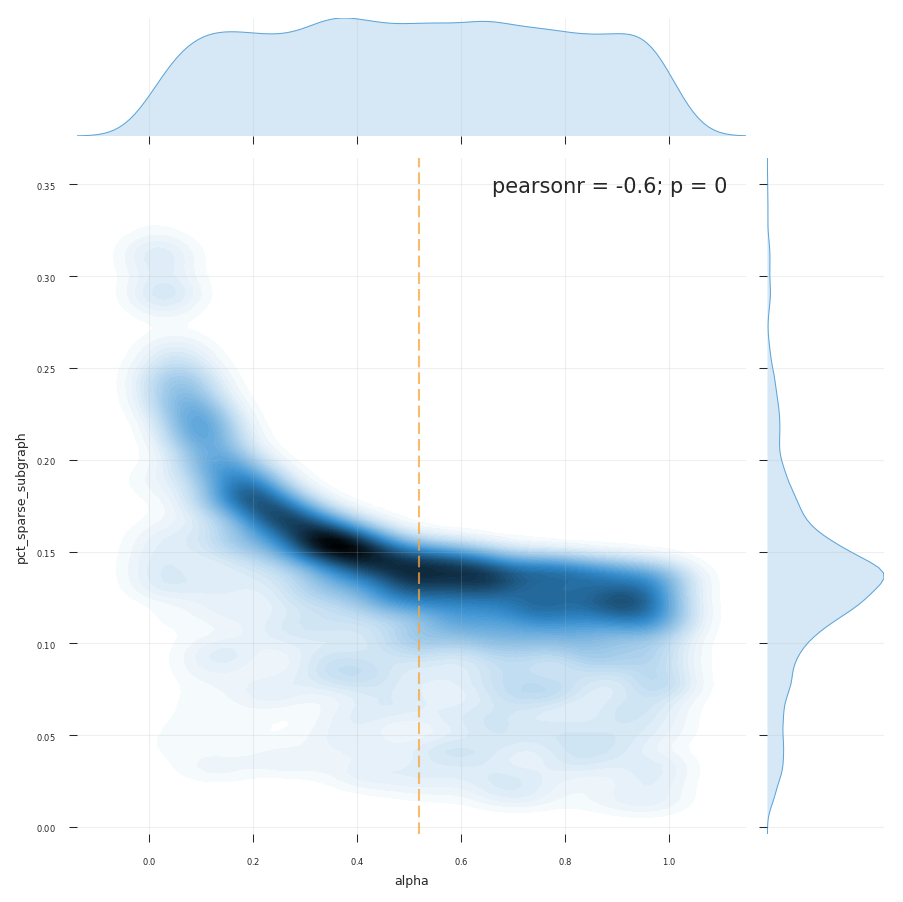

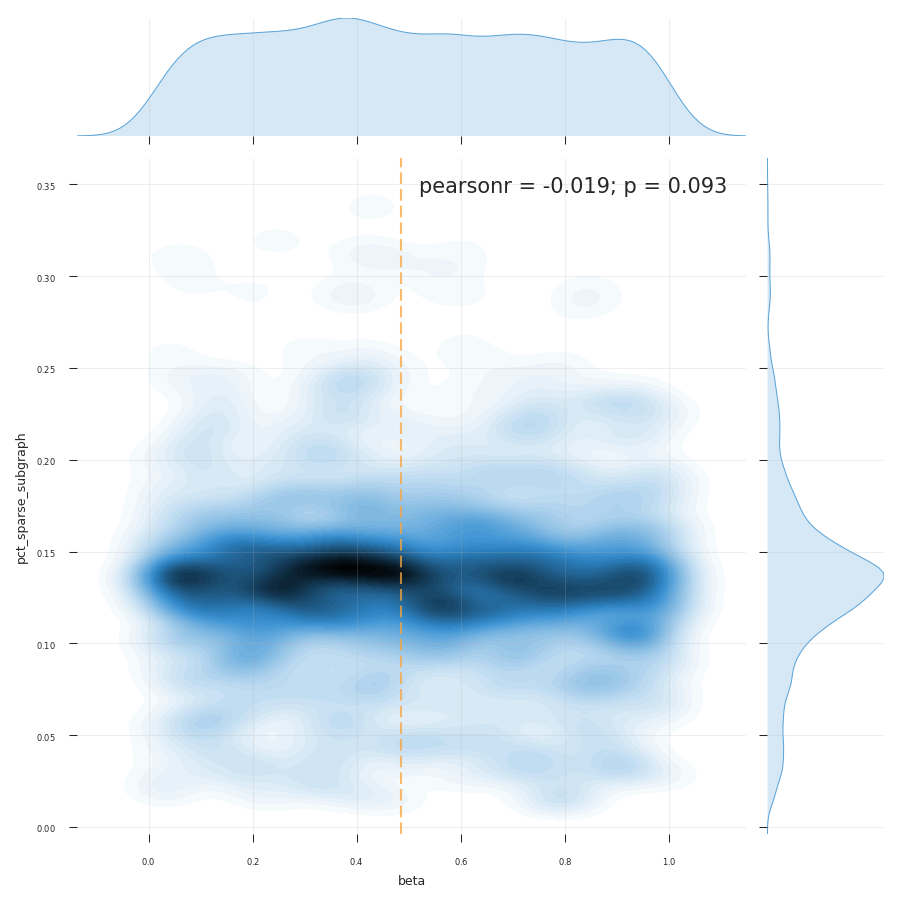

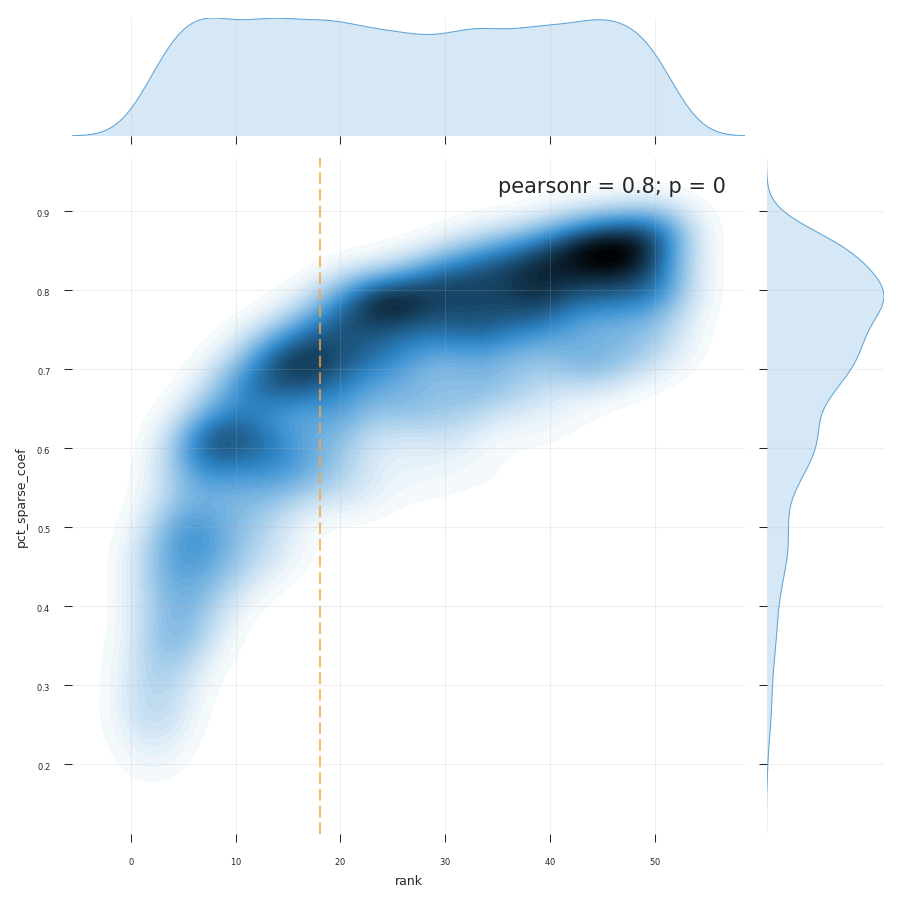

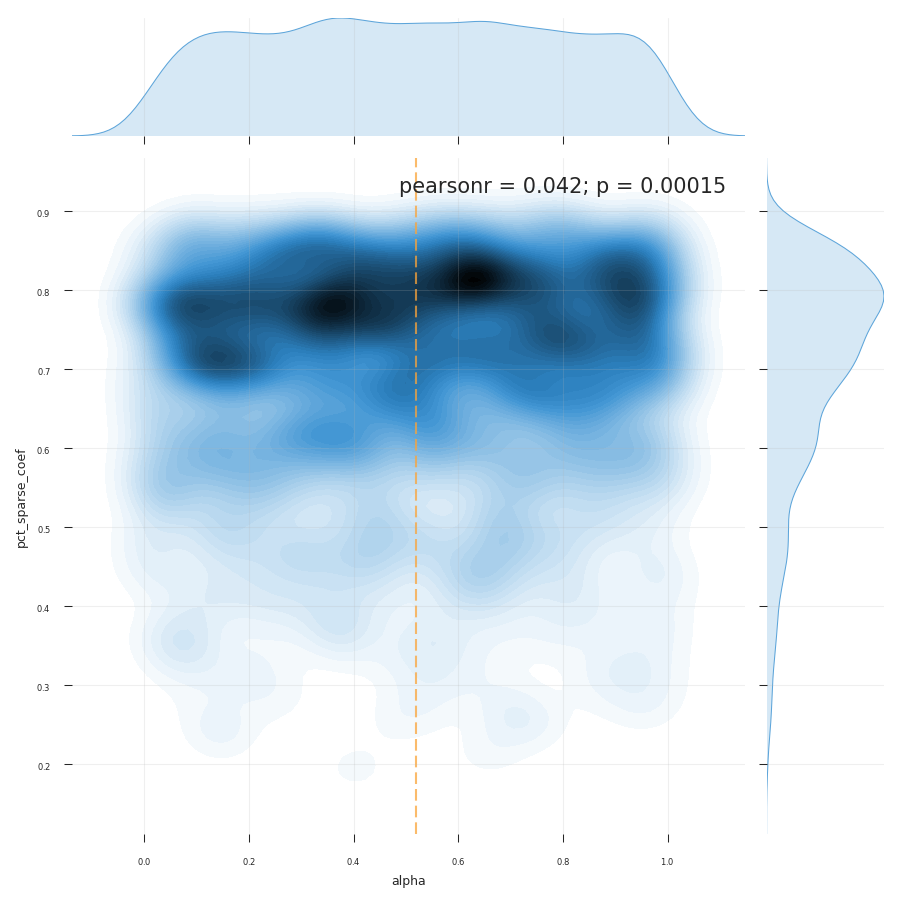

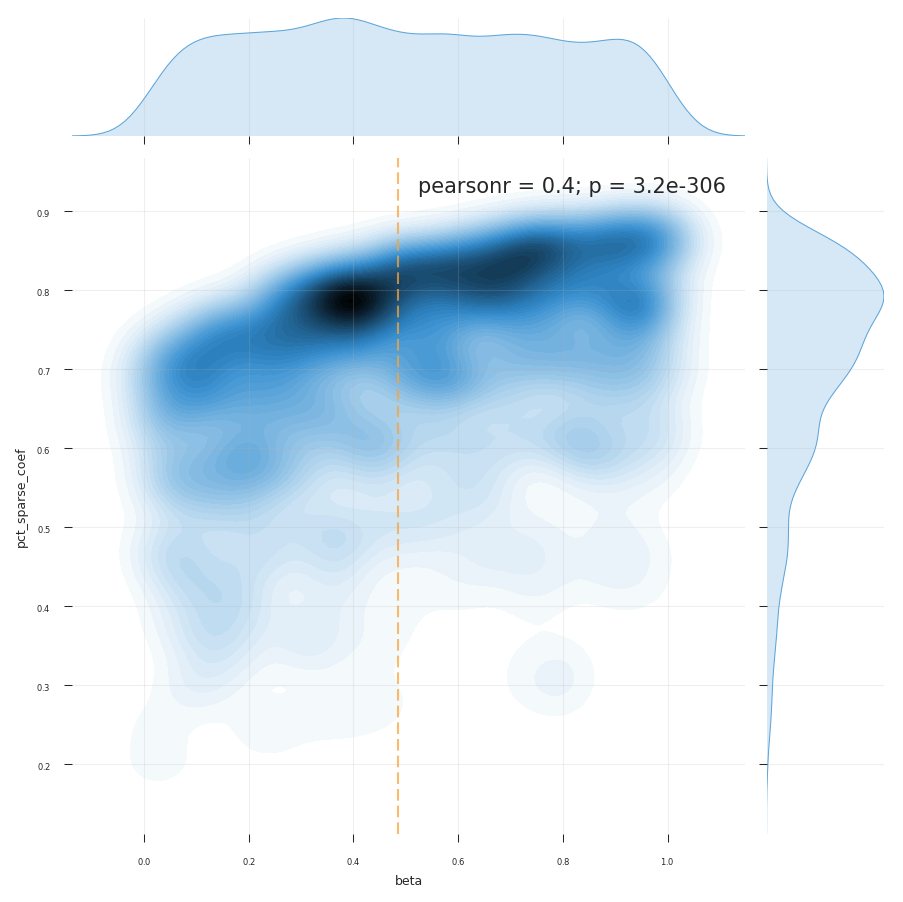

AttributeError: 'dict' object has no attribute 'close'

In [43]:
opt_dict = all_param
opt_params = {}
opt_params['rank'] = int(opt_dict['rank'][opt_dict['error'] < np.percentile(opt_dict['error'], 25)].mean().round())
opt_params['alpha'] = opt_dict['alpha'][opt_dict['error'] < np.percentile(opt_dict['error'], 25)].mean()
opt_params['beta'] = opt_dict['beta'][opt_dict['error'] < np.percentile(opt_dict['error'], 25)].mean()
print('Optimal Rank: {}'.format(opt_params['rank']))
print('Optimal Alpha: {}'.format(opt_params['alpha']))
print('Optimal Beta: {}'.format(opt_params['beta']))

# Generate quality measure plots
for qmeas in ['error', 'pct_sparse_subgraph', 'pct_sparse_coef']:
    for param in ['rank', 'alpha', 'beta']:

        param_unq = np.unique(opt_dict[param])
        qmeas_mean = [np.mean(opt_dict[qmeas][opt_dict[param]==pp]) for pp in param_unq]
        
        ax_jp = sns.jointplot(opt_dict[param], opt_dict[qmeas], kind='kde', 
                              space=0, n_levels=60, shade_lowest=False)
        ax = ax_jp.ax_joint
        ax.plot([opt_params[param], opt_params[param]], 
                [ax.get_ylim()[0], ax.get_ylim()[1]],
                lw=1.0, alpha=0.75, linestyle='--')

        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xlabel(param)
        ax.set_ylabel(qmeas)
        
        #plt.savefig('./e02b-Figures/NMF_Optimization.{}.{}.svg'.format(param, qmeas))
        plt.show()
        plt.close()
opt_dict.close()

# Detect Dynamic Subgraphs

## Map NMF Consensus to Identify Seed Subgraphs
*__WARNING: Will Delete Existing Output__*

In [87]:
# Map NMF consensus to all the parameter sets
n_opt = 1000
job_str = './NMF_consensus_map.py {} {}'.format(echobase_path, path_ExpData)
qsub_str = 'qsub -t 1-{} {}'.format(n_opt, job_str)

os.chdir('./e02b-SGE_Scripts/')
!sh {qsub_str}
os.chdir('../')

Your job-array 2600280.1-1000:1 ("NMF_consensus.py") has been submitted


## Reduce Seed Subgraphs to Consensus Subgraphs
*__WARNING: Will Delete Existing Output__*

In [4]:
# Reduce NMF consensus from all seed subgraphs
job_str = './NMF_consensus_reduce.py {} {}'.format(echobase_path, path_ExpData)
qsub_str = 'qsub {}'.format(job_str)

os.chdir('./e02b-SGE_Scripts/')
!sh {qsub_str}
os.chdir('../')

Your job 2610845 ("NMF_consensus_reduce.py") has been submitted


## Plot Subgraphs

/home/akhambhati/Developer/miniconda2/envs/echobase/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/akhambhati/Developer/miniconda2/envs/echobase/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


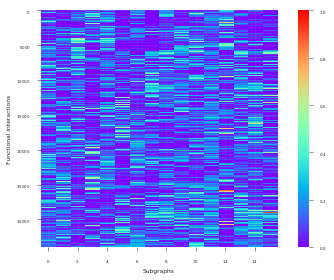

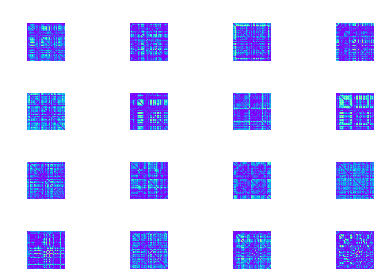

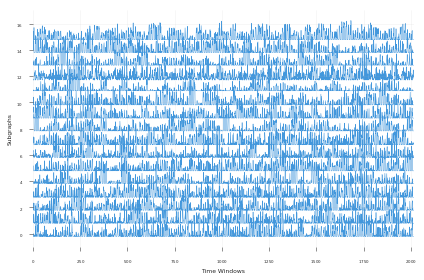

In [5]:
%matplotlib inline

# Load the consensus data
data = np.load("{}/NMF_Consensus.Param.All.npz".format(path_ExpData),
               mmap_mode='r')
fac_subnet = data['fac_subnet']
fac_coef = data['fac_coef']

# Normalize
fac_subnet = fac_subnet / fac_subnet.max()
fac_coef = fac_coef / fac_coef.max()

n_fac = fac_subnet.shape[0]
n_conn = fac_subnet.shape[1]
n_win = fac_coef.shape[1]

# Plot subgraph matrix
plt.figure()
ax = plt.subplot(111)
mat = ax.matshow(fac_subnet.T, aspect=n_fac/n_conn, cmap='rainbow', vmin=0, vmax=1)
plt.colorbar(mat, ax=ax)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#ax.set_xticks(np.linspace(0, 80, 5))
ax.set_ylabel('Functional Interactions')
ax.set_xlabel('Subgraphs')

#plt.savefig('./e02b-Figures/Subgraph-Cfg_Matrix.svg')
plt.show()
plt.close()      

# Plot subgraph adjacency
plt.figure()
n_row = np.floor(np.sqrt(n_fac))
n_col = np.ceil(n_fac / n_row)
for ii, subg in enumerate(fac_subnet):
    adj = convert_conn_vec_to_adj_matr(subg)

    ax = plt.subplot(n_row, n_col, ii+1)
    mat = ax.matshow(adj, cmap='rainbow', vmin=0, vmax=1)
    #plt.colorbar(mat, ax=ax)
    ax.set_axis_off()
    
#plt.savefig('./e02b-Figures/Subgraph-Adj_Matrices.svg')
plt.show()
plt.close()      

# Plot Coefficients
plt.figure()
ax = plt.subplot(111)

fac_coef = fac_coef.T
norm_fac = fac_coef - fac_coef.mean(axis=0)
for ff in xrange(n_fac):
    ax.plot(ff + norm_fac[:, ff] / (3*np.std(norm_fac[:, ff])), color=[66/256., 152/256., 221./256])

# Axis Settings
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylim([-1, n_fac+1])
ax.set_ylabel('Subgraphs')
ax.set_xlabel('Time Windows')

#plt.savefig('./e02b-Figures/Subgraph-Coefs.svg')
plt.show()
plt.close()  

# Subgraphs of Brain Systems

## Load Subgraphs and Expression

In [ ]:
# Grab the subgraphs and expression from consensus NMF
df_nmf = np.load("{}/NMF_Optimization.consensus_subgraph.npz".format(path_ExpData),
                 mmap_mode='r')
fac_subnet = df_nmf['fac_subnet']
fac_coef = df_nmf['fac_coef']
n_fac = fac_subnet.shape[0]
n_conn = fac_subnet.shape[1]
n_node = np.int(np.ceil(np.sqrt(n_conn*2)))
n_obs = fac_coef.shape[1]

# Retrieve the configuration matrix
# Get expression for: subgraphs, subjects, task conditions + pos/neg interactions, blocks
path_cfg_expr = glob.glob('{}/NMF_Optimization.CfgMatr.npz'.format(path_ExpData))[0]
df_cfg = np.load(path_cfg_expr, mmap_mode='r')
cfg_key = df_cfg['cfg_key']
key_type = np.unique(cfg_key)
n_key = len(key_type)
n_block = 6 
n_subj = n_obs / (n_key*n_block)
fac_coef_subj = np.zeros((n_fac, n_subj, n_key, n_block))
for key_ii, key in enumerate(key_type):
    key_ix = np.flatnonzero(cfg_key == key)
    fac_coef_subj[:, :, key_ii, :] = fac_coef[:, key_ix].reshape(n_fac, n_subj, n_block)

## Load Atlas

In [ ]:
### Get the Lausanne Labels
df_parcel = pd.read_csv('{}/LausanneScale125.csv'.format(path_CoreData))

lausanne_lbl = []
for lbl_id, lbl_roi, lbl_hemi in zip(df_parcel.Label_ID, df_parcel.ROI, df_parcel.Hemisphere):
    roi_name = '{}_{}'.format(lbl_hemi, lbl_roi)
    lausanne_lbl.append(roi_name)
lausanne_lbl = np.array(lausanne_lbl)

### Get the system assignments for each ROI
df_sys = h5py.File('{}/sysInfo234.mat'.format(path_CoreData), 'r')
system_lbl = [''.join(unichr(c) for c in df_sys[rr])
              for rr in df_sys['sysInfo']['system'][0, :]]
for ii in xrange(len(system_lbl), n_node):
    system_lbl.append(u'cerebellum')
system_lbl = np.array(system_lbl)
system_name = np.unique(system_lbl)

### Get the sizes for each system
system_size = []
for sys_name in system_name:
    system_size.append(len(np.flatnonzero(system_lbl == sys_name)))

### Reorder systems by alternating size
system_ix = np.argsort(system_size)[::-1]
system_ix_large = system_ix[:len(system_ix)//2]
system_ix_small = system_ix[len(system_ix)//2:][::-1]
system_ord = []
for ii, ij in zip(system_ix_large, system_ix_small):
    system_ord.append(ii)
    system_ord.append(ij)
if len(system_ord)+1 == len(system_ix):
    system_ord.append(system_ix_small[-1])
    
new_system_name = system_name.copy()
for ii, sys_ix in enumerate(system_ord):
    new_system_name[ii] = system_name[sys_ix]
system_name = np.array(new_system_name)

### Reorder the parcellation based on re-ordered systems labels
srt_system_ix = []
for sys_name in system_name:
    for ll_ix in np.flatnonzero(system_lbl == sys_name):
        srt_system_ix.append(ll_ix)
srt_system_ix = np.array(srt_system_ix)
srt_system_lbl = system_lbl[srt_system_ix]
srt_lausanne_lbl = lausanne_lbl[srt_system_ix]

df_sys.close()

### Render brain systems

In [ ]:
from mayavi import mlab
import nibabel as nib

brain_system_pixmap = []

sys_scalar = [5, 18, 2, 0, 3, 4, 6, 8, 10, 9, 15]
view_angle = {'Sag_PA': [0.0, 90.0],
              'Sag_AP': [180.0, 90.0]}

# Get the pial surface recons
pial_hemi = {'LH': {},
             'RH': {}}
pial_hemi['LH']['vert'], pial_hemi['LH']['tria'] = nib.freesurfer.io.read_geometry('{}/BrainRenderSubject15/surf/lh.pial'.format(path_CoreData))
pial_hemi['RH']['vert'], pial_hemi['RH']['tria'] = nib.freesurfer.io.read_geometry('{}/BrainRenderSubject15/surf/rh.pial'.format(path_CoreData))

# Get the Lausanne label files for each ROI
label_files = []
for roi in lausanne_lbl:
    hemi = roi.split('_')[0].lower()
    
    # Parse the atlas name and find the label file if it exists
    if len(roi.split('_')) == 2:
        lbl_file = ('%s.%s.label' % tuple(roi.split('_'))).lower()
    elif len(roi.split('_')) == 3:
        lbl_file = ('%s.%s_%s.label' % tuple(roi.split('_'))).lower()
    else:
        raise Exception
    lbl_file = lbl_file.replace(' ', '')

    label_files.append('{}/BrainRenderSubject15/label/regenerated_{}_125/{}'.format(path_CoreData, hemi, lbl_file))

# Iterate over hemisphere of the pial surface
for hemi in pial_hemi.keys():
    n_vert = len(pial_hemi[hemi]['vert'])
    
    # Iterate over brain system
    for sys_id, sys_lbl in enumerate(system_name):
        print(sys_lbl)
        sys_ix = np.flatnonzero(system_lbl == sys_lbl)
        
        # Find the label file for each ROI and get vertices
        if sys_lbl == 'subcortical':
            pial_scalars = sys_scalar[sys_id]*np.ones(n_vert)
        else:
            pial_scalars = 15*np.ones(n_vert)
        for roi_ix, (roi, lbl_file) in enumerate(zip(lausanne_lbl, label_files)):
            if roi.split('_')[0] != hemi:
                continue

            if not os.path.exists(lbl_file):
                continue

            # Load the file and add scalar to the vertices
            parc_lbl = nib.freesurfer.io.read_label(lbl_file)                
            if roi_ix in sys_ix:
                pial_scalars[parc_lbl] = sys_scalar[sys_id]
            else:
                pial_scalars[parc_lbl] = 15               
            
        # Plot the colored Brain System
        fig = mlab.figure(bgcolor=(1.0, 1.0, 1.0))
        src = mlab.pipeline.triangular_mesh_source(pial_hemi[hemi]['vert'][:,0],
                                                   pial_hemi[hemi]['vert'][:,1],
                                                   pial_hemi[hemi]['vert'][:,2],
                                                   pial_hemi[hemi]['tria'], scalars=pial_scalars, opacity=0.75, figure=fig)
        norms = mlab.pipeline.poly_data_normals(src, figure=fig)
        norms.filter.splitting = False
        surf = mlab.pipeline.surface(norms, figure=fig)
        surf.parent.scalar_lut_manager.set(lut_mode='Vega20', data_range=[0, 19], use_default_range=False)
        lut = surf.module_manager.scalar_lut_manager.lut.table.to_array()
        lut[188:213, 3] = 220
        surf.module_manager.scalar_lut_manager.lut.table = lut
        
        # Rotate the view and save a screenshot
        pixmap = {}
        for ang in view_angle.keys():
            mlab.view(azimuth=view_angle[ang][0],
                      elevation=view_angle[ang][1])
            pixmap['{}_{}'.format(hemi, ang)] = mlab.screenshot(mode='rgba')
        brain_system_pixmap.append(pixmap)
        mlab.close(all=True)
        
np.savez('./e02b-Figures/brain_system_pixmap.npz',
         brain_system_pixmap=brain_system_pixmap)

## Condense Subgraphs into a Dictionary

In [ ]:
system_subgraph = []
for fac_i, subg in enumerate(fac_subnet):
    print('Processed: {} of {}'.format(fac_i+1, len(fac_subnet)))
    
    adj = convert_conn_vec_to_adj_matr(subg)
    adj = adj[srt_system_ix, :][:, srt_system_ix]
    coef = fac_coef_subj[fac_i, ...]
    
    # Generate subgraph dictionary
    system_subgraph.append({'Subgraph_ID': fac_i+1,
                            'full_subg': adj[srt_system_ix, :][:, srt_system_ix],
                            'expr_coef': coef})

np.savez('{}/Subgraph.All.npz'.format(path_ExpData),
         system_subgraph=system_subgraph,
         lausanne_labels=srt_lausanne_lbl,
         system_labels=srt_system_lbl,
         system_names=system_name,
         brain_system_pixmap=brain_system_pixmap,
         task_key=key_type)

## Filter Subgraphs with Sparse Expression 

In [ ]:
# Load in the System-Level subgraph data
df_subg = np.load('{}/Subgraph.All.npz'.format(path_ExpData))
sys_subgraph = df_subg['system_subgraph']
n_fac = len(sys_subgraph)

pct_sparse_mean = []
pct_sparse_std = []
for fac_ix in xrange(n_fac):
    fac_coef = sys_subgraph[fac_ix]['expr_coef']
    pct_sparse = (fac_coef == 0).reshape(fac_coef.shape[0], -1).mean(axis=-1)
    pct_sparse_mean.append(pct_sparse.mean())
    pct_sparse_std.append(pct_sparse.std() / np.sqrt(fac_coef.shape[0]))
pct_sparse_mean = np.array(pct_sparse_mean)
pct_sparse_std = np.array(pct_sparse_std)

# Find the sparsity order
fac_ord_ix = np.argsort(pct_sparse_mean)
fac_thresh = 20

# Plot the distribution of temporal sparsity over subgraphs
% matplotlib inline
plt.figure()
ax = plt.subplot(111)
ax.plot(np.arange(n_fac), pct_sparse_mean[fac_ord_ix], 'k')
ax.fill_between(np.arange(n_fac),
                pct_sparse_mean[fac_ord_ix]-pct_sparse_std[fac_ord_ix],
                pct_sparse_mean[fac_ord_ix]+pct_sparse_std[fac_ord_ix])
ax.vlines(fac_thresh, 0, 1, 'r')

ax.set_xlim([-0.5, n_fac-0.5])        
plt.xticks(np.arange(0, n_fac+1, 6),
           np.arange(0, n_fac+1, 6))
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('Ranked Subgraphs')

ax.set_ylim([0, 1])        
ax.set_yticks(np.linspace(0, 1.0, 5))
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Percent Sparse Coefficients')
plt.savefig('./e02b-Figures/Sparse_Coefs.svg')
plt.show()

sys_subgraph = sys_subgraph[fac_ord_ix[:fac_thresh]]

np.savez('{}/Subgraph.Filtered.npz'.format(path_ExpData),
         system_subgraph=sys_subgraph,
         lausanne_labels=df_subg['lausanne_labels'],
         system_labels=df_subg['system_labels'],
         system_names=df_subg['system_names'],         
         brain_system_pixmap=df_subg['brain_system_pixmap'],
         task_key=df_subg['task_key'])

## Circle Plot

In [ ]:
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from scipy import ndimage

df_subg = np.load('{}/Subgraph.Filtered.npz'.format(path_ExpData))
sys_subgraph = df_subg['system_subgraph']
sys_name = df_subg['system_names']
sys_label = df_subg['system_labels']
sys_pixmap = df_subg['brain_system_pixmap']
n_sys = len(sys_name)
n_lbl = len(sys_label)

vega20_cmap = np.array([[31, 119, 180],
                        [174, 199, 232],
                        [255, 127, 14],
                        [255, 187, 120],
                        [44, 160, 44],
                        [152, 223, 138],
                        [214, 39, 40],
                        [255, 152, 150],
                        [148, 103, 189],
                        [197, 176, 213],
                        [140, 86, 75],
                        [196, 156, 148],
                        [227, 119, 194],
                        [247, 182, 210],
                        [127, 127, 127],
                        [199, 199, 199],
                        [188, 189, 34],
                        [219, 219, 141], 
                        [23, 190, 207],
                        [158, 218, 229]])
vega20_sys = np.array([5, 18, 2, 0, 3, 4, 6, 8, 10, 9, 15])
node_clr = np.array([vega20_cmap[vega20_sys[sys_name == sys_lbl]][0, :] / 255.  for sys_lbl in sys_label])


system_pos = []
node_rads = np.linspace(0, 2*np.pi - (2*np.pi/n_lbl), n_lbl)
for sys_ii, sys_nm in enumerate(sys_name):
    sys_rad = np.mean(node_rads[sys_label == sys_nm])
    if sys_ii % 2 == 0:
        dd = 12
    else:
        dd = 12   
    system_pos.append((sys_rad, dd))
        
        
for f_ii, sys_subg in enumerate(sys_subgraph):
    sys_con = convert_adj_matr_to_cfg_matr(sys_subg['full_subg'].reshape(1, 
                                                                         sys_subg['full_subg'].shape[0],
                                                                         sys_subg['full_subg'].shape[0])).squeeze()
    fig, ax = Echobase.Plotting.render_circle_connectivity.draw(conn_list=sys_con,
                                                                conn_pct=[99, 100],
                                                                conn_linewidth=2.0,
                                                                node_color=node_clr)
    
    fig.axes[0].set_ylim(0, 20)

    for sys_ii in xrange(n_sys):
        if sys_name[sys_ii] in ['dorsal_attention', 'cerebellum', 'subcortical', 'default_mode']:
            arr = sys_pixmap[sys_ii+11]['LH_Sag_PA']
        elif sys_name[sys_ii] in ['ventral_attention']:
            arr = sys_pixmap[sys_ii+11]['LH_Sag_AP']
            arr = np.fliplr(arr)
        else:
            arr = sys_pixmap[sys_ii]['RH_Sag_PA']
        arr = ndimage.rotate(arr, (system_pos[sys_ii][0] - np.pi/2) * 180/np.pi, reshape=False)

        imagebox = OffsetImage(arr, zoom=0.20)
        imagebox.axes = fig.axes[0]

        ab = AnnotationBbox(imagebox, 
                            xy=system_pos[sys_ii],
                            xycoords='data',
                            frameon=False,
                            pad=0.0)

        fig.axes[0].add_artist(ab)
    fig.savefig('./e02b-Figures/Circle_Subgraph.{}.svg'.format(f_ii))
    plt.close()